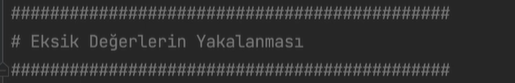

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)






In [3]:


def load():
    data = pd.read_csv("../datasets/titanic.csv")
    return data


df = load()
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


Eksik gözlem var mı yok mu sorusu

In [4]:
df.isnull().values.any()

np.True_

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False



<h1>Dolu olan değerlerin toplamı </h1>

In [7]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<h1>veri setinde ki toplam eksik veri sayısı</h1>

In [8]:
df.isnull().sum().sum()

np.int64(866)

In [9]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


<h1>Azalan bir şekilde eksik verileri sıralama </h1>

In [10]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

<h1>Yüzdelik olarak eksik veriyi sıralama</h1>

In [11]:
(df.isnull().sum() / df.shape[0]* 100 ).sort_values(ascending = False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Name           0.000
Pclass         0.000
Survived       0.000
Sex            0.000
Parch          0.000
SibSp          0.000
Fare           0.000
Ticket         0.000
dtype: float64

In [12]:
na_cols =[ col for col in df.columns if df[col].isnull().sum()>0]
na_cols

['Age', 'Cabin', 'Embarked']

In [13]:
(df.isnull().sum() / df.shape[0]* 100 ).sort_values(ascending = False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Name           0.000
Pclass         0.000
Survived       0.000
Sex            0.000
Parch          0.000
SibSp          0.000
Fare           0.000
Ticket         0.000
dtype: float64

In [14]:
def missing_values_table ( datafreame , na_name=False):
    na_columns = [col for col in datafreame.columns if datafreame[col].isnull().sum()>0]
    n_miss = (datafreame[na_columns].isnull().sum()).sort_values(ascending = False)
    ratio = (datafreame[na_columns].isnull().sum() / datafreame.shape[0] * 100 ).sort_values(ascending =False)
    missing_df = pd.concat([n_miss , np.round(ratio,2)] , axis =1 , keys = ['n_miss' , 'ratio'])
    print(missing_df,end="\n")
    if na_columns:
        return na_columns

In [15]:
missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

 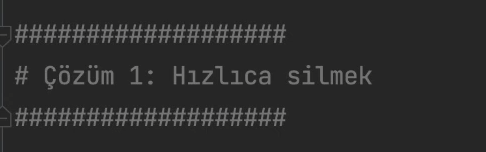

In [16]:
df.dropna().shape

(183, 12)

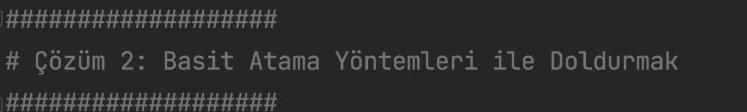

In [17]:
df["Age"].fillna(df["Age"].mean()).isnull().sum()
df["Age"].fillna(df["Age"].median()).isnull().sum()
df["Age"].fillna(0).isnull().sum()

np.int64(0)

In [18]:
df["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
30     False
31      True
32      True
33     False
34     False
35     False
36      True
37     False
38     False
39     False
40     False
41     False
42      True
43     False
44     False
45      True
46      True
47      True
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55      True
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64      True
65      True
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76      True

In [19]:
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x ,axis =0)

In [20]:
missing_values_table(dff)

          n_miss  ratio
Cabin        687 77.100
Embarked       2  0.220


['Cabin', 'Embarked']

In [21]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

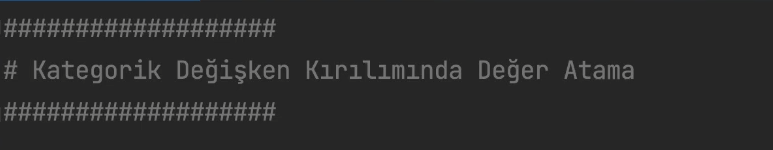

In [22]:
df.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [23]:
df["Age"].mean()

np.float64(29.69911764705882)

In [24]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

np.int64(0)

In [25]:
df.loc[(df["Age"].isnull()) & (df["Sex"] == "female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

df.loc[(df["Age"].isnull()) & (df["Sex"] == "male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

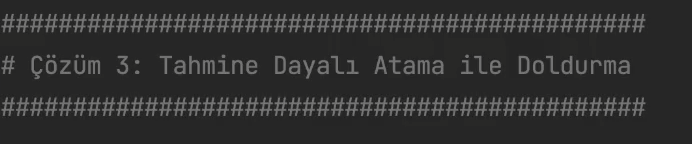

In [27]:
df = load()

In [28]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car




In [29]:
cat_cols , num_cols , cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [30]:
num_cols = [col for col in num_cols if col not in "PassengerId"]


In [31]:
num_cols

['Age', 'Fare']

In [33]:
dff = pd.get_dummies(df[cat_cols + num_cols] ,drop_first= True)

In [34]:
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,True,False,True
1,1,1,1,0,38.000,71.283,False,False,False
2,1,3,0,0,26.000,7.925,False,False,True
3,1,1,1,0,35.000,53.100,False,False,True
4,0,3,0,0,35.000,8.050,True,False,True
5,0,3,0,0,NaN,8.458,True,True,False
6,0,1,0,0,54.000,51.862,True,False,True
7,0,3,3,1,2.000,21.075,True,False,True
8,1,3,0,2,27.000,11.133,False,False,True
9,1,2,1,0,14.000,30.071,False,False,False


In [36]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff),columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [37]:
# knn uygulamsı 

In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame.(imputer.fit_transform(dff),columns = dff.columns)

SyntaxError: invalid syntax (1302753365.py, line 3)